# Kunskapskontroll 3
Vi tittar på en samling data om boende och befolkning i Kalifornien. Datat ligger i filen `housing.csv`. 

Vi kommer använda av oss av Pythonbiblioteken `numpy`,`matplotlib` och `pandas`


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Import och inspekting av data
Vi läser in filen `housing.csv` som ligger i samma directory som detta script

In [61]:
housing_original = pd.read_csv("housing.csv")

En första titt på datat ger att det är tio kolumner. Alla utom sista verkar vara numeriska

In [62]:
housing_original.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Genom att exekvera `housing_original.info()` kan vi bekräfta att de första 9 kolumnerna är numeriska och sista kolumnen är icke-numerisk (text/sträng) Vidare kan vi se att det är 20639 rader plus en titelrad

In [63]:
housing_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Rader som saknar värden i en eller flera kolumner kan orsaka fel senare. Därför är det av intresse att ta bort alla rader med NaN i sig.

Vi kan använda os av  `<dataframe>.isnull().any(axis=1)` för att kolla alla kolumner för varje rad.

In [64]:
housing_original[housing_original.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Vi kan se att 207 av raderna har minst ett NaN värde. Eftersom man aldrig ska operera på originaldatat vill vi skapa en kopia av `housing_original`.

Metoden `<dataframe>.dropna()` är utmärkt i smammanhanget då den "droppar" alla rader med NaN samtidigt som en ny dataframe skapas.

In [65]:
housing = housing_original.dropna()

OKej, vad har vi nu? Kolla närmare mha `housing.info()`

In [66]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Utmärkt. Nu har vi en dataframe vi kan jobba med.

Den har 20433 rader och har 10 kolumner. Man kan få lite övergripande stats på datat med metoden `.describe()`

In [67]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Dags att titta närmare på datat i `housing` 

`.corr()`ger korrelationen mellan olika kolumner - men jobbar bara med numeriska kolumner och sista kolumnen är ju string. vi gör en tillfällig numerisk variant...

In [68]:
housing["ocean_proximity"].value_counts()
mapping_placement = {"ISLAND": 1, "NEAR BAY": 2, "NEAR OCEAN": 3, "<1H OCEAN": 4, "INLAND": 5}
housing.loc[:, "placement"] = housing["ocean_proximity"].map(mapping_placement)  # Explicitly updating the "placement" column

housing_numeric = housing.drop(columns=["ocean_proximity"])
housing_numeric.corr()


/var/folders/hp/wztqd6mx4rgf8876d7j8j1tr0000gn/T/ipykernel_4293/1795630488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.loc[:, "placement"] = housing["ocean_proximity"].map(mapping_placement)  # Explicitly updating the "placement" column


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,placement
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.271779
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.007637
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.295519
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.032244
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.010014
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.040096
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.011654
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.164069
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.396780
placement,0.271779,-0.007637,-0.295519,0.032244,0.010014,0.040096,-0.011654,-0.164069,-0.396780,1.000000


I resultatet ser vi korrelationen mellan de olika kolumnerna:

- +1.0 betyder perfekt korrelation
- 0.0 betyder ingen korrelation
- -1.0 betyder perfekt negativ korrelation

Vi kan till exempel se att det är hög korrelation mella `population` och `housholds` (0.9072), men att korrelationen är ännu större mellan `housholds` och `total_bedrooms` (0.9797). Hög korrelation syns i ett spridningsdiagram som en linje från nedres vänstra hörnet till övre högra (små värden till stora). Det är alltså få hushåll som saknar sovrum (Se graf nedan)

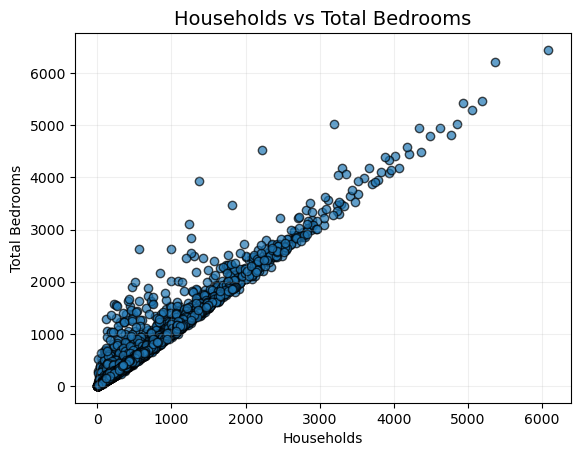

In [69]:
plt.scatter(housing["households"], housing["total_bedrooms"], alpha=0.7, edgecolor="k")
plt.title("Households vs Total Bedrooms", fontsize=14)
plt.xlabel("Households", fontsize=10)
plt.ylabel("Total Bedrooms", fontsize=10)
plt.grid(True, alpha=0.2)

I tabellen ovan med korrelationsdata kan vi också se att det så gott som saknas korrelation mellan `median_income` och `population` (0.005) vilket syns i följande spridningsdiagram då spridningen av populationen är ungefär lika oavsett medianinkomsten. Två datapunkter sticker ut med stor population och låg medianinkomst. Kan det vara slum-områden?

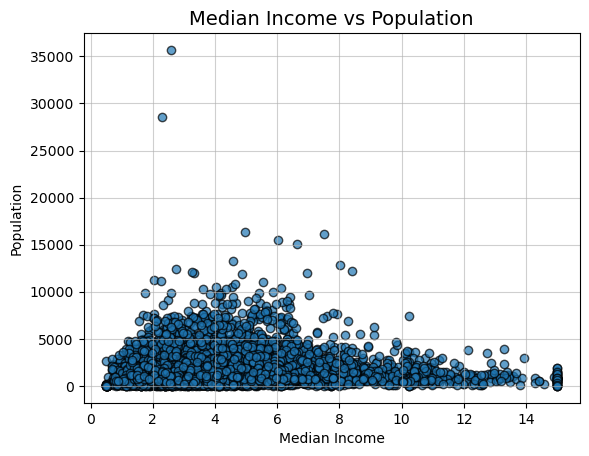

In [70]:
plt.scatter(housing["median_income"], housing["population"], alpha=0.7, edgecolor="k")
plt.title("Median Income vs Population", fontsize=14)
plt.xlabel("Median Income", fontsize=10)
plt.ylabel("Population", fontsize=10)
plt.grid(True, alpha=0.6)

Vi kan ta hjälp av `.scatter_matrix()` för att få en grafisk visning av korrelationen mellan kolumner liknande den som `.cor()` ger. Man kan ge hela dataframe:en som argument, men med så många columner blir det rörigt. Därför kan man använda ett sub-set av kolumnerna...

array([[<Axes: xlabel='households', ylabel='households'>,
        <Axes: xlabel='population', ylabel='households'>,
        <Axes: xlabel='total_rooms', ylabel='households'>,
        <Axes: xlabel='housing_median_age', ylabel='households'>],
       [<Axes: xlabel='households', ylabel='population'>,
        <Axes: xlabel='population', ylabel='population'>,
        <Axes: xlabel='total_rooms', ylabel='population'>,
        <Axes: xlabel='housing_median_age', ylabel='population'>],
       [<Axes: xlabel='households', ylabel='total_rooms'>,
        <Axes: xlabel='population', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='households', ylabel='housing_median_age'>,
        <Axes: xlabel='population', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'

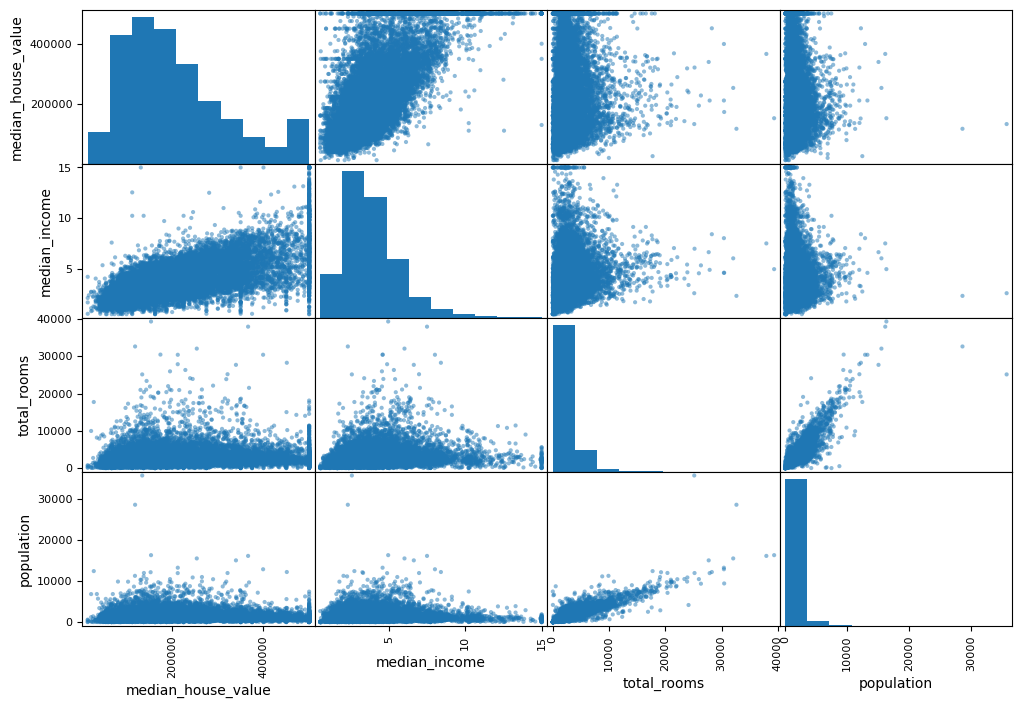

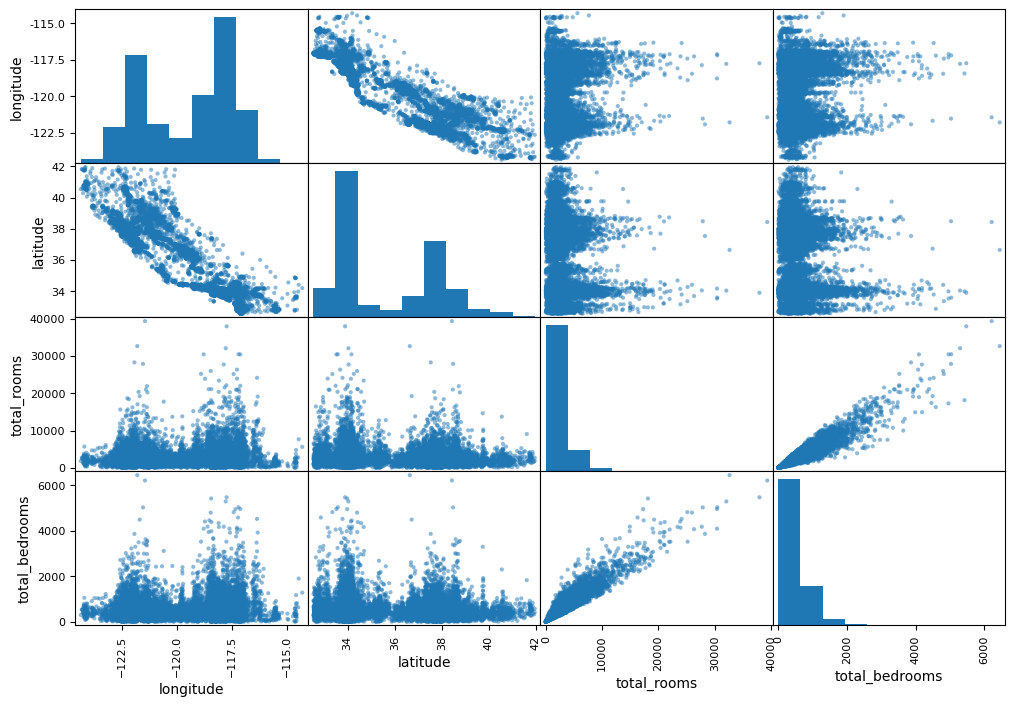

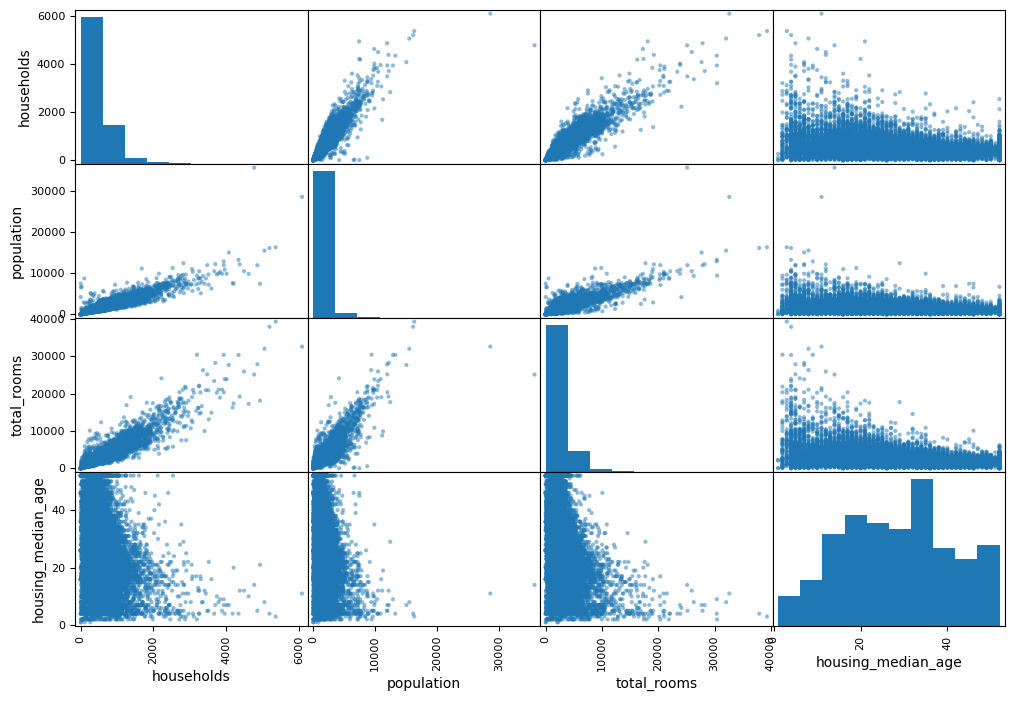

In [71]:
column_names = ["median_house_value", "median_income", "total_rooms", "population"]


# skapa en subset-dataframe för att smidigare visualisera kolumnernas värden med de andra i spridningsdiagram
housing_subset = housing[column_names]
pd.plotting.scatter_matrix(housing_subset, figsize=(12, 8))

column_names = ["longitude", "latitude", "total_rooms", "total_bedrooms"]
housing_subset = housing[column_names]
pd.plotting.scatter_matrix(housing_subset, figsize=(12, 8))

column_names = ["households", "population", "total_rooms", "housing_median_age"]
housing_subset = housing[column_names]
pd.plotting.scatter_matrix(housing_subset, figsize=(12, 8))

## Fortsättning

Följande försöker visa om det finns samband mellan placeringen ({"ISLAND": 1, "NEAR BAY": 2, "NEAR OCEAN": 3, "<1H OCEAN": 4, "INLAND": 5}) och Medianinkomst och husen medianvärden

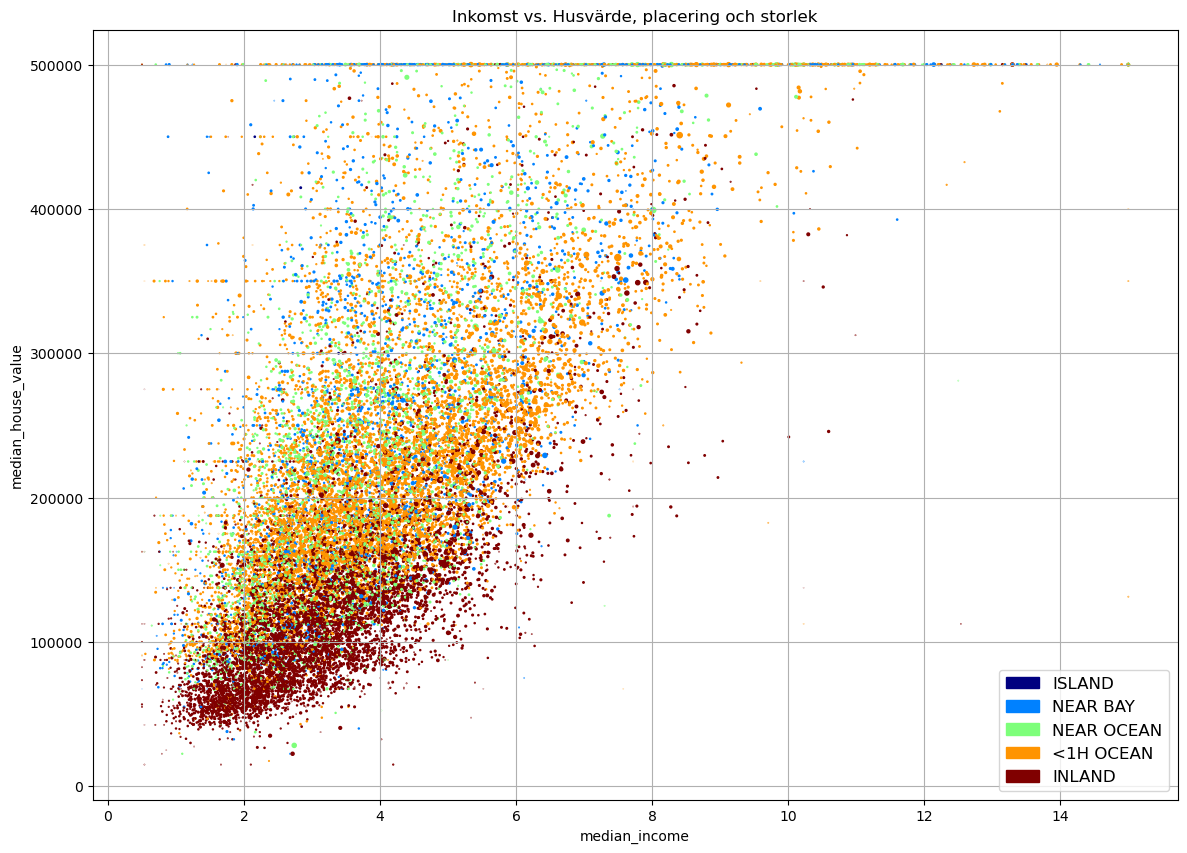

In [72]:
import matplotlib.patches as mpatches

colormap = plt.get_cmap("jet")
placement_mapping = {
    1: "ISLAND",
    2: "NEAR BAY",
    3: "NEAR OCEAN",
    4: "<1H OCEAN",
    5: "INLAND"
}
plt.figure(figsize=(14, 10))

scatter = plt.scatter(
    x=housing["median_income"],
    y=housing["median_house_value"],
    s=housing["total_rooms"]/2000, 
    c=housing["placement"],
    cmap=colormap,
    alpha=1,
    # edgecolor="k",
    label="Data"
)

plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.title("Inkomst vs. Husvärde, placering och storlek")

# Add color mapping explaination to the legend
handles = []
for k in range(1, 6):                                      # values 1..5
    color_percentage = colormap((k - 1)/4)                 # normalize values between 0 and 1
    patch = mpatches.Patch(color=color_percentage, label=placement_mapping[k])
    handles.append(patch)


plt.legend(handles=handles, fontsize=12)
plt.grid(True)
plt.show()

I diagrammet ovan ser vi (med reservation för att punkterna kan överlppa varandra vid uppritning) att medianhusvärdena är lägre i inlandet. Det finns ingen tydlig korrelation mellan medianinkomst och var man bor geografiskt. Det finns en konstig linje i toppen av medianhusvärdena.

I nästa plottning använder jag placement för att illustrera hur "placment" (dvs "ocean_proximity") är definierat. Alltså var liggen INLAND resp de andra värdena. Med ett lågt värde på alpha kan man se hur antalet datapunkter på "samma" position ger en kraftigare färg eftersom punkterna överlagras. Här är varje datapunkt konstant i storlek.

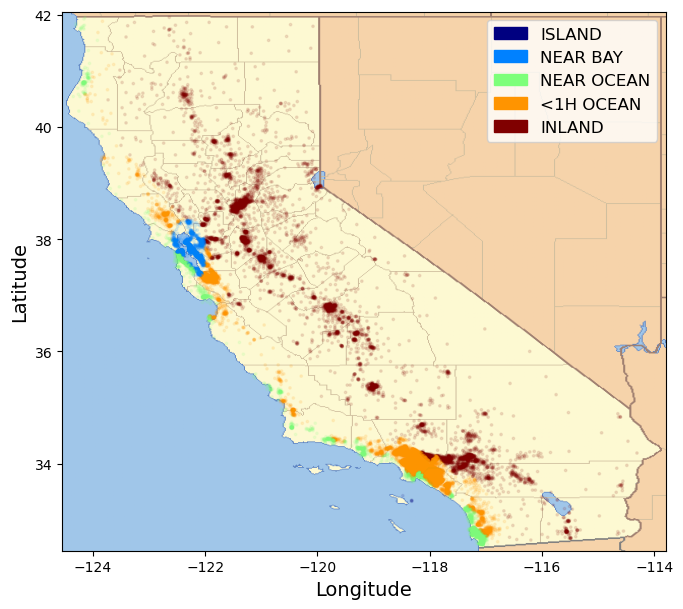

In [73]:
import matplotlib.image as mpimg

# the picture file is in the samae folder as the script
california_img=mpimg.imread("california.png")
colormap = plt.get_cmap("jet")

placement_mapping = {
    1: "ISLAND",
    2: "NEAR BAY",
    3: "NEAR OCEAN",
    4: "<1H OCEAN",
    5: "INLAND"
}

ax = housing.plot(kind="scatter", 
                  x="longitude", 
                  y="latitude", 
                  figsize=(10,7),
                  s=3, 
                  label="Placement",
                  c="placement", 
                  cmap=colormap,
                  colorbar=False, 
                  alpha=0.1)


plt.imshow(california_img, 
           extent=[-124.55, -113.80, 32.45, 42.05], 
           alpha=1.0,
           cmap=colormap)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Add color mapping explaination to the legend
handles = []
for k in range(1, 6):                                      # values 1..5
    color_percentage = colormap((k - 1)/4)                 # normalize values between 0 and 1
    patch = mpatches.Patch(color=color_percentage, label=placement_mapping[k])
    handles.append(patch)


plt.legend(handles=handles, fontsize=12) 

Låt oss titta viare på lite data. Här kommer ett spridningsdiagram som visar "Median House Value vs Median Income"

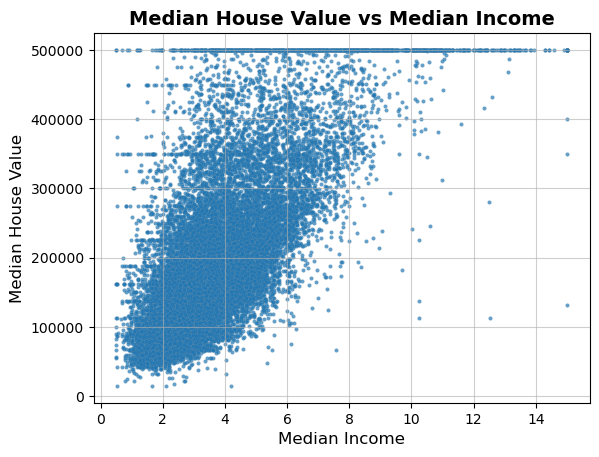

In [74]:
# Let's use matplotlib's puplot to render a scatter diagram based on "median_income" and "median_house_value"
plt.scatter(housing["median_income"], housing["median_house_value"], alpha=0.7, s=8, edgecolor="darkgray", linewidth=0.1)
plt.title("Median House Value vs Median Income", fontsize=14, fontweight="bold")
plt.xlabel("Median Income", fontsize=12)
plt.ylabel("Median House Value", fontsize=12)
plt.grid(True, alpha=0.62)

Som synes finns en "linje" i diagrammets överkant. Det innebär att det finns många datapunkter med värdet 500000. 

Vi tittar in på kolumnen "median_house_value" och ritar ett histogram. Den allra vanligaste distributionen av data är "normalfördelningen". En symmetrisk klockformad fördelning, om datat är slumpmässigt. Detta datat är inte slumpmässigt så vi kan inte räkna med en perfekt numalfördelning. I diagrammet ser vi nästan en normalfördelning med toppen placerad runt cirka 15000 och sedan en mer utragen "svans" för hägre värden.

MEN, en tydlig anomali finns vid värdet 500000. Det finns ca 1000 datapunkter med värdet 500000. Ett mycket rimligare antal skulle vara 20-25 stycken datapunkter. En gissning från min sida är att vid datainsamlingen satte man 500000 som maxvärde för 'Median House Value', dvs värdet "500000" bytyder egentligen "500000 eller mer" 

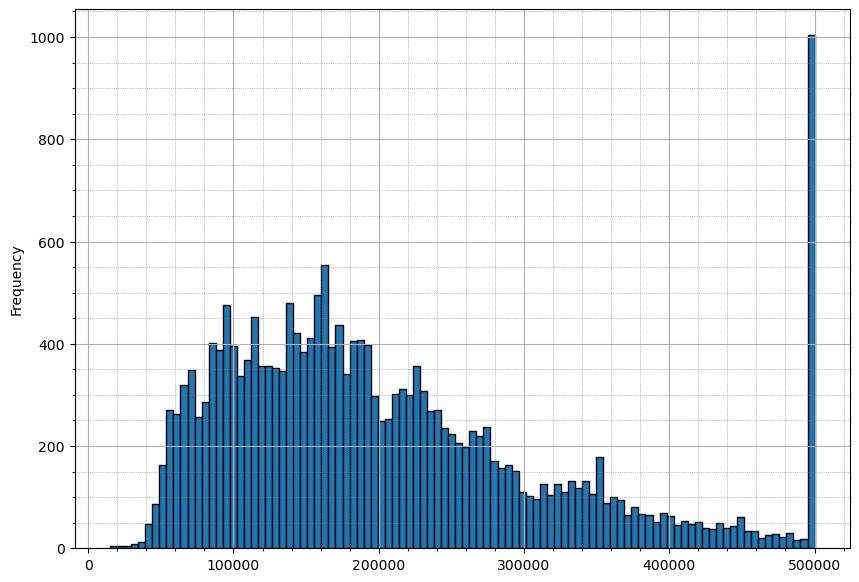

In [75]:

ax = housing["median_house_value"].plot.hist(bins=100, edgecolor="black", grid=True, figsize=(10, 7))
ax.minorticks_on()
ax.grid(which="minor", color="gray", linestyle=":", linewidth=0.5)


Vi gräver vidare i "median_house_value" och gör en ny dataframe som bara innehåller de rader som har "median_house_value" = 500000

In [76]:
housing_only_500000 = housing[housing["median_house_value"] >= 500001]
housing_only_500000.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,placement
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY,2
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,2
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY,2
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY,2
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY,2


In [77]:
housing_only_500000.info()


<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 89 to 20443
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           958 non-null    float64
 1   latitude            958 non-null    float64
 2   housing_median_age  958 non-null    float64
 3   total_rooms         958 non-null    float64
 4   total_bedrooms      958 non-null    float64
 5   population          958 non-null    float64
 6   households          958 non-null    float64
 7   median_income       958 non-null    float64
 8   median_house_value  958 non-null    float64
 9   ocean_proximity     958 non-null    object 
 10  placement           958 non-null    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 89.8+ KB


OK - så när jag kollade var det 27 datapunkter med "median_house_value" = 5000000 och 958 datapunkter med "median_house_value" = 5000001, som jag då misstänker betyder "större än 500000"

Så hur ser Kaliforniendiagrammet ut med dataframe:en `housing_only_500000` ???

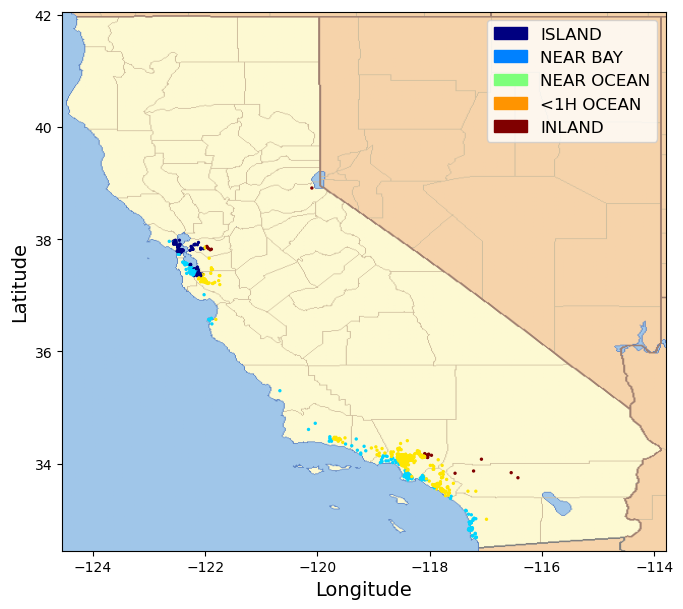

In [78]:
colormap = plt.get_cmap("jet")

placement_mapping = {
    1: "ISLAND",
    2: "NEAR BAY",
    3: "NEAR OCEAN",
    4: "<1H OCEAN",
    5: "INLAND"
}

ax = housing_only_500000.plot(kind="scatter",   # Another dataframe (only 500000+ in data)
                  x="longitude", 
                  y="latitude", 
                  figsize=(10,7),
                  s=2, 
                  label="Placement",
                  c="placement", 
                  cmap=colormap,
                  colorbar=False, 
                  alpha=1)


plt.imshow(california_img, 
           extent=[-124.55, -113.80, 32.45, 42.05], 
           alpha=1.0,
           cmap=colormap)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Add color mapping explaination to the legend
handles = []
for k in range(1, 6):                                      # values 1..5
    color_percentage = colormap((k - 1)/4)                 # normalize values between 0 and 1
    patch = mpatches.Patch(color=color_percentage, label=placement_mapping[k])
    handles.append(patch)


plt.legend(handles=handles, fontsize=12) 

Alltså, som man kan tro. De riktigt dyra husen är koncentrerade kring San Fransiscos bukt och längsmed kustlandet ner mot Los Angeles. En mycket spännande datapunkt ligger nära sjön där Kaliforniens gräns mot Nevada gör en skarp knyck. ~ W120, N39. en titt på Google Maps säger att det är *Emerald Bay* vid Lake Tahoe...

## Avrundning
När jag sökte på "*californian counties housing prices csv file*" fick jag en träff på "https://www.kaggle.com/datasets/camnugent/california-housing-prices" som verkar bekant :). 

Kolumnförklaringen är:

About this file

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

Dessa kolumnförklaringar kunde varit till nytta/hjälp för studenterna

Hur som helst. Det har varit skoj men man inser att det finns ingen hejd på hur man kan gräva och vinkla/spegla data...

# Självutvärdering

### 1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 
Det är alltid lite mer "utmanande" när en uppgift är formulerad som *gör något* istället gör specifika uppgifter. Vi hade för visso ett exempel på hur man kan jobba (som Antonio presenterat på lektion och dessutom bifogat som fil) - det var tacksamt. Viss utmaning låg i att få till den presentation som man vill (layout/design typ). Där har Chat-GPT varit till stor nytta och hjälp vilket också gett en viss träning på hur man kan nyttja Chat-GPT i sammanhang som detta

### 2. Vilket betyg anser du att du ska ha och varför? 
Betyget G. 

Jag tor jag gjort det som förväntades. Initialt hade jag lite idéer om att "bygga ut" datat genom att skapa nya kolumner som var beräknade på befintlga för att på så sätt kolla lite mer komplexa relationer. Men tiden finns/fanns inte.

Vad som krävs för betyget VG vet jag inte och det har inte kommunicerats eller ens antytts på något sätt.


### 3. Något du vill lyfta fram till Antonio?
Antonio har ett utmärkt tempo och ser till att alla (på lektionen) för en fråga eller blir tilltalade. Media behandlas också bra, men jag tyckar att Antonio (läraren) borde få en *ritbräda* (typ Wacom) för att kunna rita live på ett bättre sätt.